PROBLEMS
- Still no non-neural network comparison for frequency detection
- All frequencies don't have same signature for top/bottom classification
    - eg a frequency near boundary much harder than one near middle - is this a problem?
    - hypothesis: every frequency will eventually become a boundary after enough subsampling (eg last bit), but ones that start off near the boundary remain near the boundary for more iterations - higher probability of failure

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from graph_utils import *

Boundary testing done on SNR = 4dB, taking 25 samples at each feed forward into network (only 2-radix). Test set is uniform over all frequencies and is of size 250,000. Numbers below graph represent the top 10 most frequently misclassified frequencies and how often they are misclassified. Red lines represent boundaries (N/2, N/4, 3N/4, ...). 
Test set accuracy (overall) for all signal lengths was above 80% for no correction and above 95% for 1 bit correction.

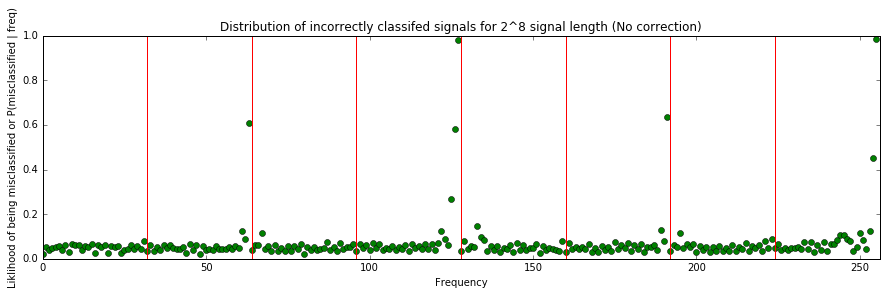

[(255, 0.9838), (127, 0.9818), (191, 0.6352), (63, 0.6088), (126, 0.58), (254, 0.4529), (125, 0.2697), (133, 0.1474), (189, 0.1299), (253, 0.1264)]


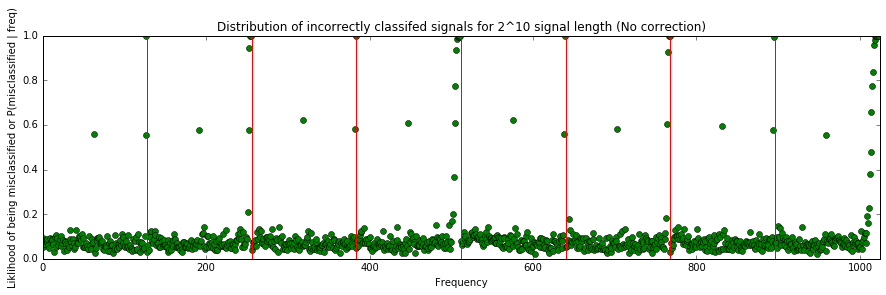

[(511, 1.0), (767, 1.0), (766, 1.0), (639, 1.0), (510, 1.0), (383, 1.0), (255, 1.0), (254, 1.0), (127, 1.0), (1023, 1.0)]


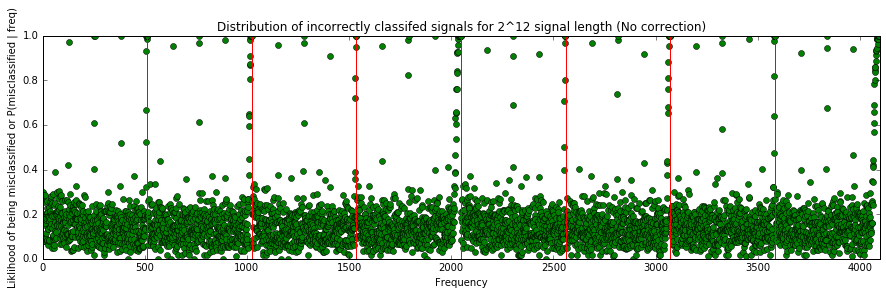

[(2041, 1.0), (2044, 1.0), (2045, 1.0), (2043, 1.0), (2040, 1.0), (2558, 1.0), (2046, 1.0), (2303, 1.0), (2557, 1.0), (4095, 1.0)]


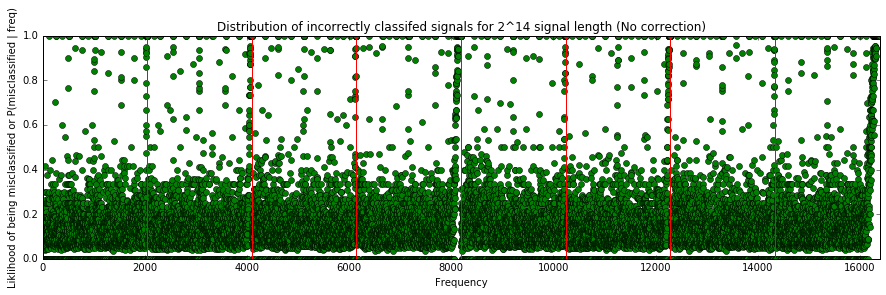

[(10233, 1.0), (10230, 1.0), (10229, 1.0), (10231, 1.0), (10234, 1.0), (10224, 1.0), (10227, 1.0), (10226, 1.0), (10225, 1.0), (16383, 1.0)]


In [2]:
base, exps = 2, [8, 10, 12, 14]
m = 25
for e in exps:
    a = np.load('../data/boundary_testing_big/wrong_actual_small_exp{}.npy'.format(e))
    b = np.load('../data/boundary_testing_big/freq_counts_exp{}.npy'.format(e))
    plot_missed_freqs_total_percent(base, e, a, b, title='Distribution of incorrectly classifed signals for {}^{} signal length (No correction)'.format(base, e))

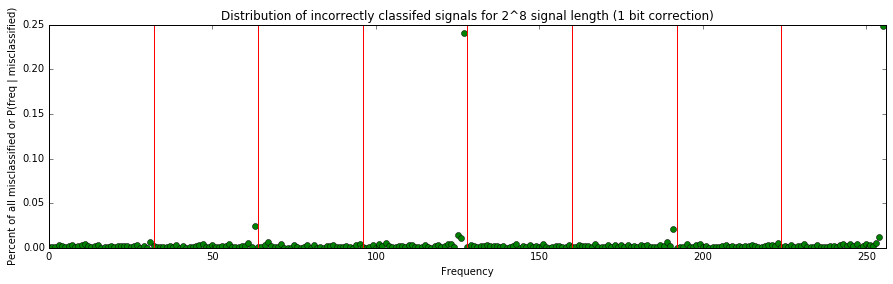

[(255, 0.2483), (127, 0.2403), (63, 0.0244), (191, 0.0207), (125, 0.0138), (254, 0.0117), (126, 0.0111), (189, 0.0069), (67, 0.0069), (31, 0.0064)]


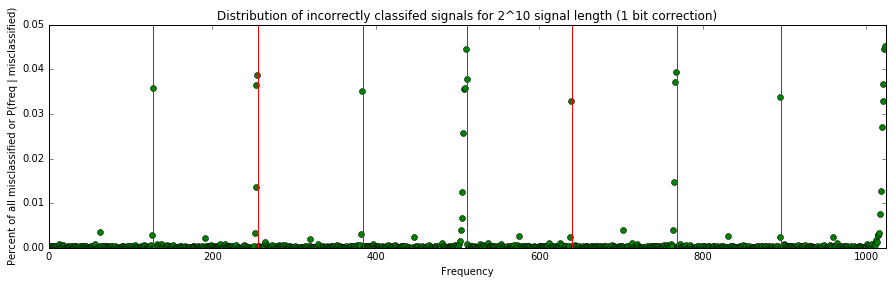

[(1023, 0.0452), (510, 0.0445), (1022, 0.0445), (767, 0.0393), (255, 0.0388), (511, 0.0378), (766, 0.0371), (1021, 0.0366), (254, 0.0364), (127, 0.0357)]


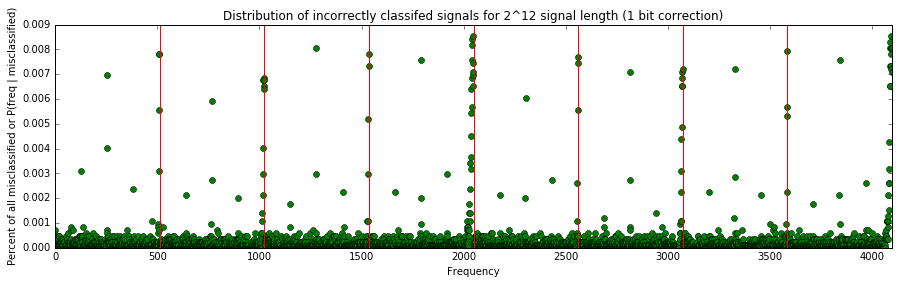

[(4089, 0.0085), (2045, 0.0085), (2041, 0.0084), (4086, 0.0083), (2042, 0.0082), (4093, 0.0081), (4088, 0.0081), (1279, 0.0081), (4095, 0.0081), (3582, 0.0079)]


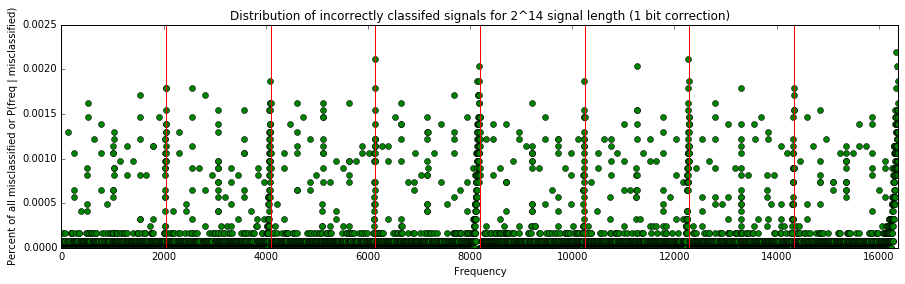

[(16342, 0.0022), (12258, 0.0021), (6140, 0.0021), (16362, 0.002), (11259, 0.002), (8176, 0.002), (4087, 0.0019), (10232, 0.0019), (12286, 0.0019), (8180, 0.0019)]


In [3]:
base, exps = 2, [8, 10, 12, 14]
m = 25
for e in exps:
    a = np.load('../data/boundary_testing_big/wrong_actual_full_exp{}.npy'.format(e))
    b = np.load('../data/boundary_testing_big/freq_counts_exp{}.npy'.format(e))
    plot_missed_freqs(base, e, a, title='Distribution of incorrectly classifed signals for {}^{} signal length (1 bit correction)'.format(base, e))

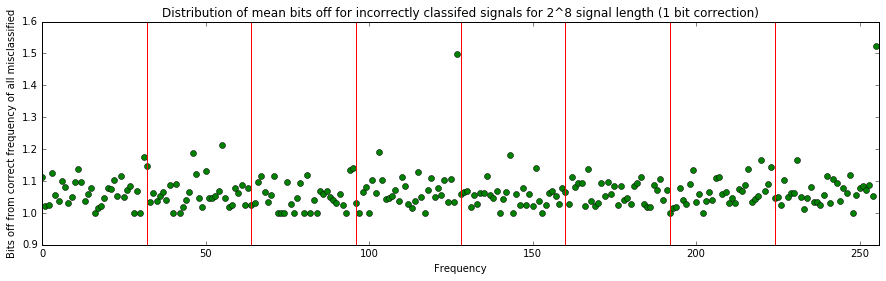

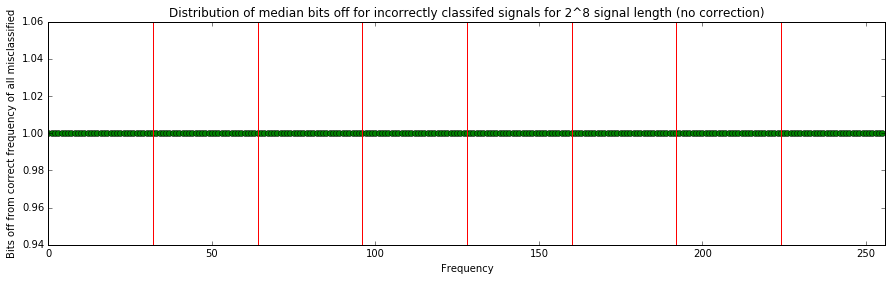

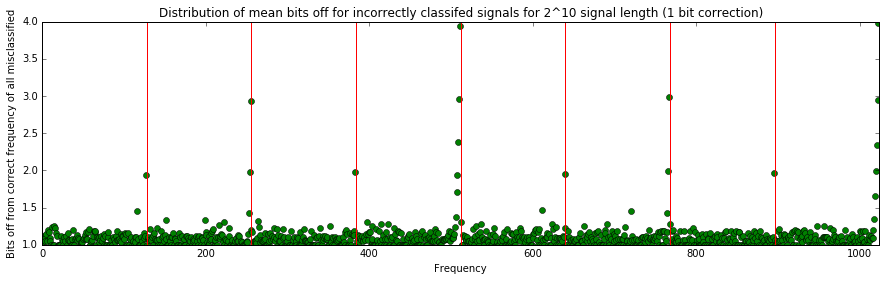

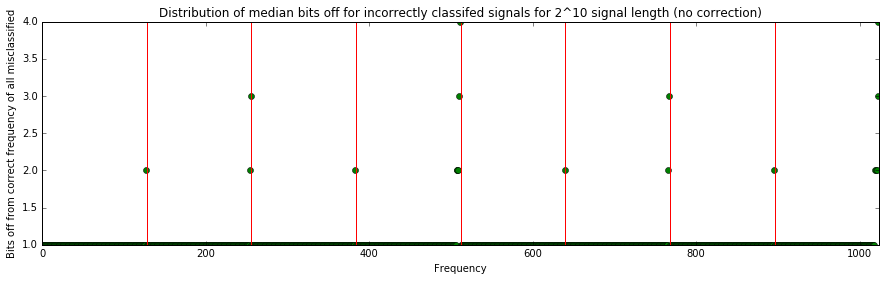

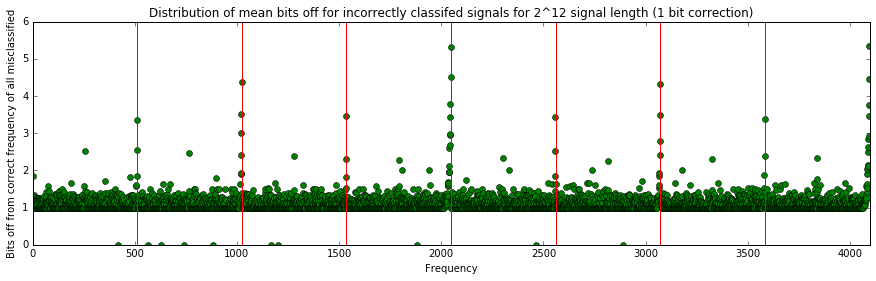

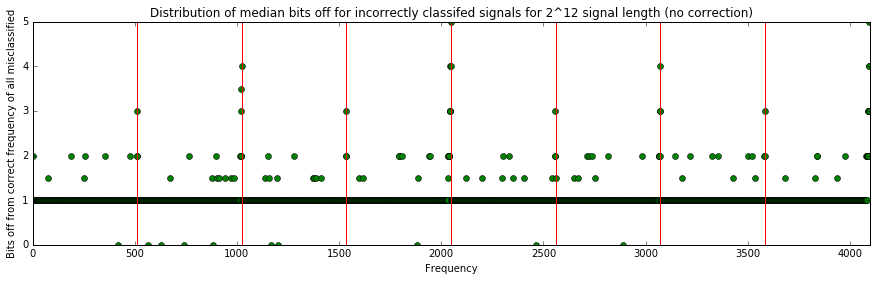

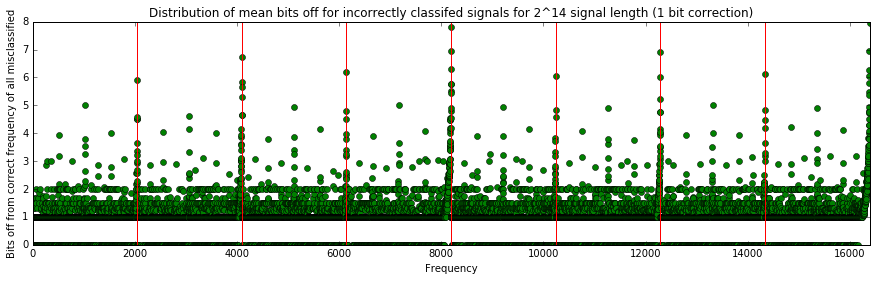

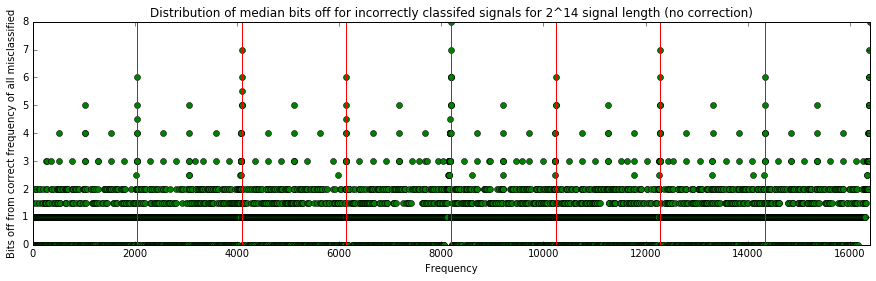

In [10]:
base, exps = 2, [8, 10, 12, 14]
m = 25
for e in exps:
    wrongs = np.load('../data/boundary_testing_big/wrong_actual_small_exp{}.npy'.format(e))
    bits_off = np.load('../data/boundary_testing_big/bits_off_small_exp{}.npy'.format(e))
    plot_bits_off(base, e, wrongs, bits_off, avg_func=np.mean, title='Distribution of mean bits off for incorrectly classifed signals for {}^{} signal length (1 bit correction)'.format(base, e))
    plot_bits_off(base, e, wrongs, bits_off, avg_func=np.median, title='Distribution of median bits off for incorrectly classifed signals for {}^{} signal length (no correction)'.format(base, e))

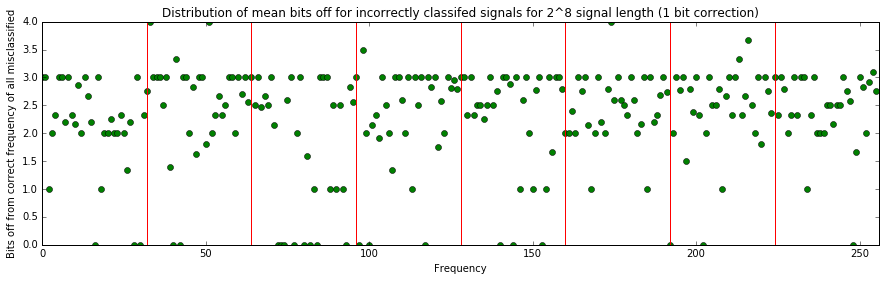

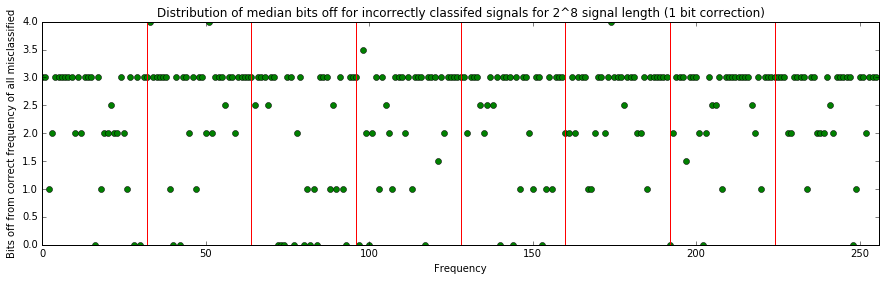

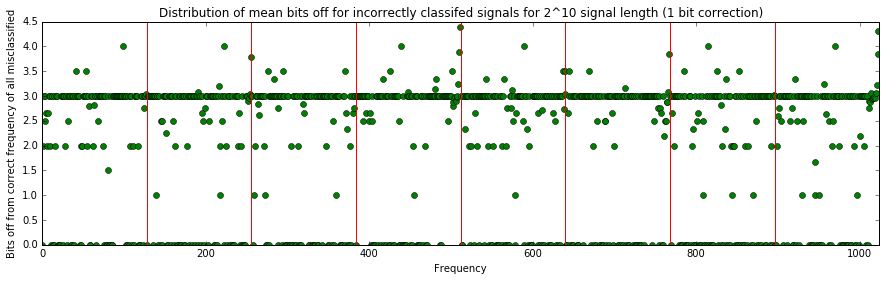

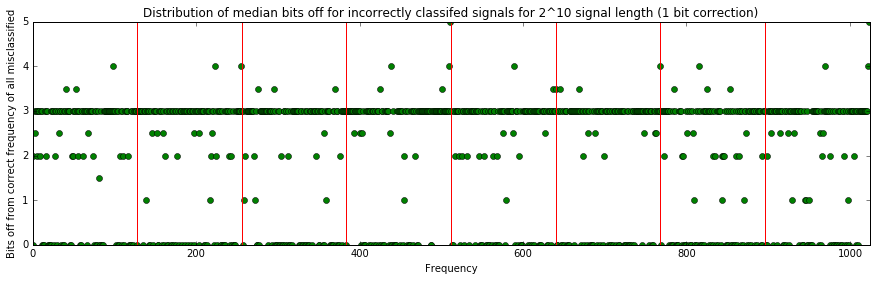

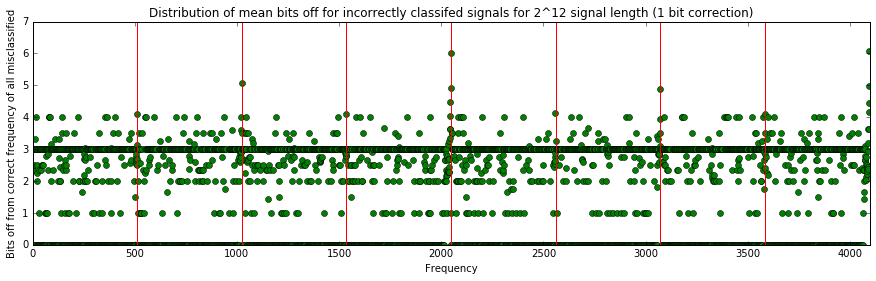

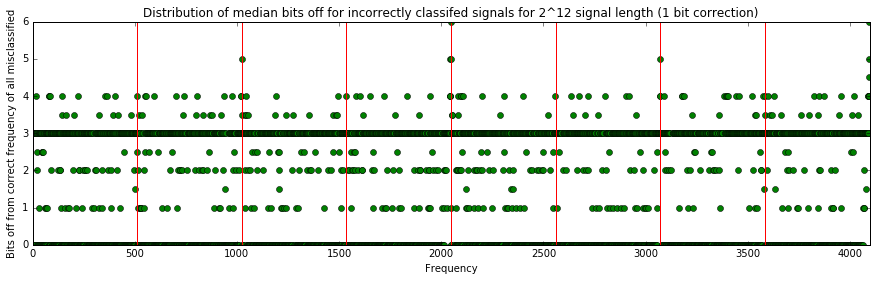

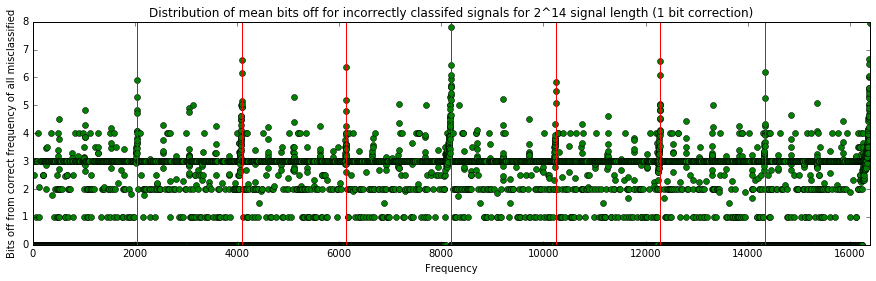

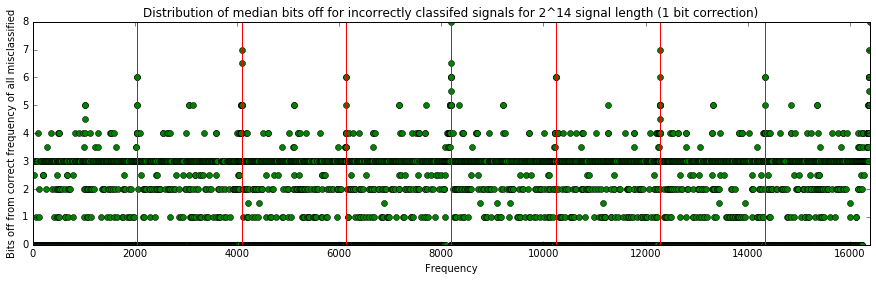

In [11]:
base, exps = 2, [8, 10, 12, 14]
m = 25
for e in exps:
    wrongs = np.load('../data/boundary_testing_big/wrong_actual_full_exp{}.npy'.format(e))
    bits_off = np.load('../data/boundary_testing_big/bits_off_full_exp{}.npy'.format(e))
    plot_bits_off(base, e, wrongs, bits_off, avg_func=np.mean, title='Distribution of mean bits off for incorrectly classifed signals for {}^{} signal length (1 bit correction)'.format(base, e))
    plot_bits_off(base, e, wrongs, bits_off, avg_func=np.median, title='Distribution of median bits off for incorrectly classifed signals for {}^{} signal length (1 bit correction)'.format(base, e))

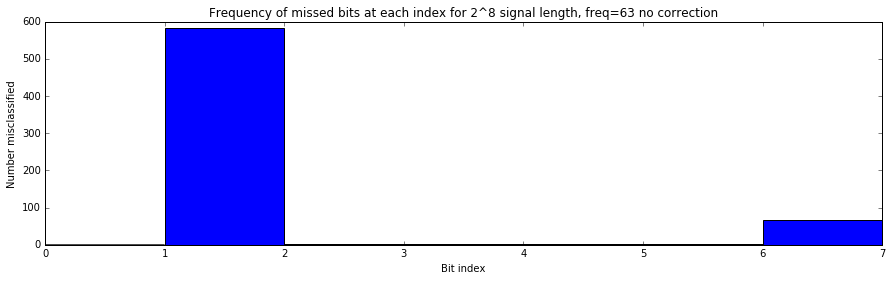

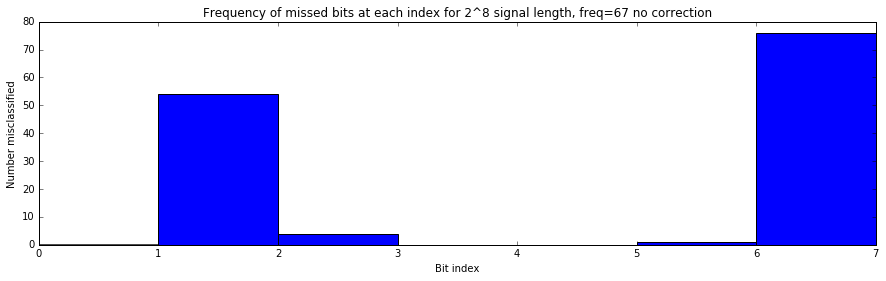

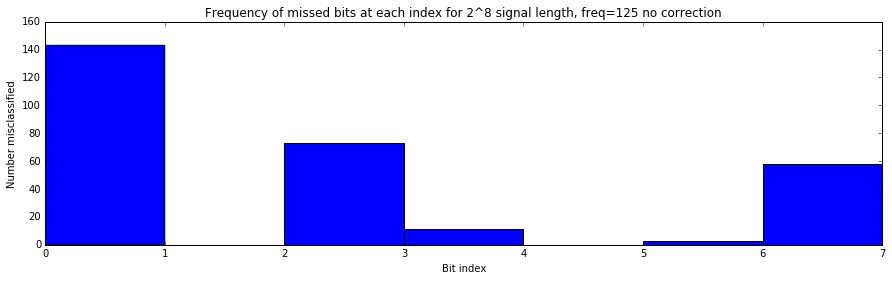

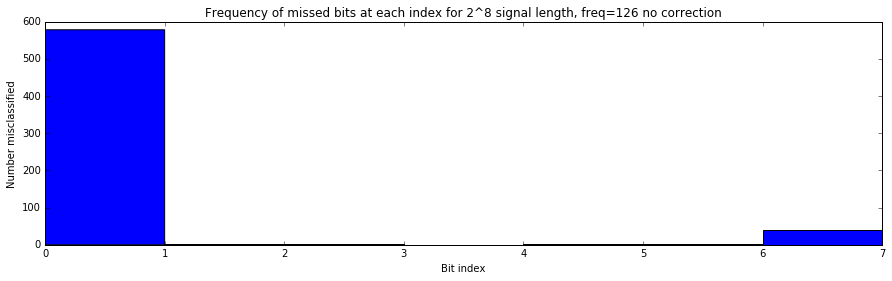

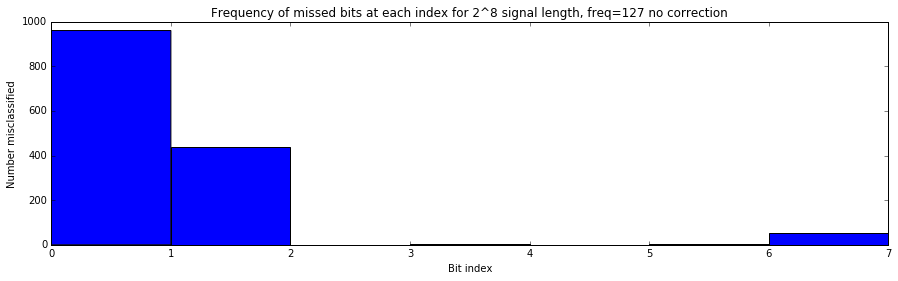

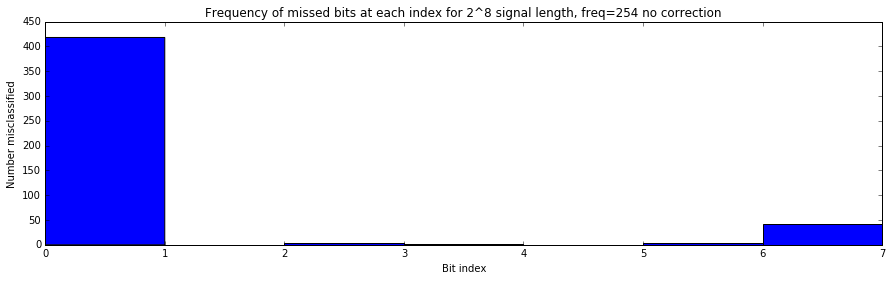

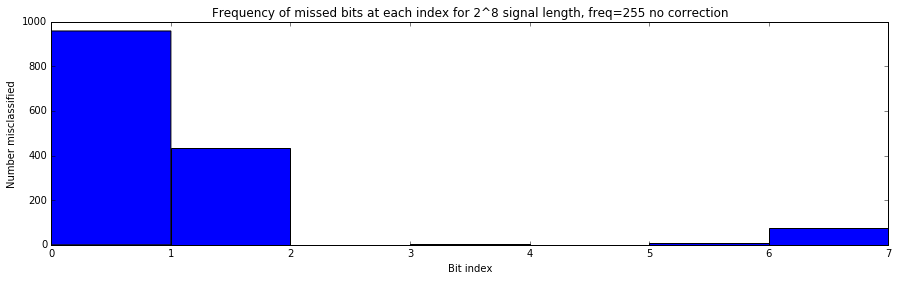

In [6]:
base, exp = 2, 8
bad_index = [63, 67, 125, 126, 127, 254, 255] 
m = 25
for ind in bad_index:
    bits = np.load('../data/boundary_testing_big/wrong_bits_small_exp{}.npy'.format(exp))
    wrongs = np.load('../data/boundary_testing_big/wrong_actual_small_exp{}.npy'.format(exp))
    plot_missed_bits_for_freq(base, exp, ind, wrongs, bits, title='Frequency of missed bits at each index for {}^{} signal length, freq={} no correction'.format(base, exp, ind))

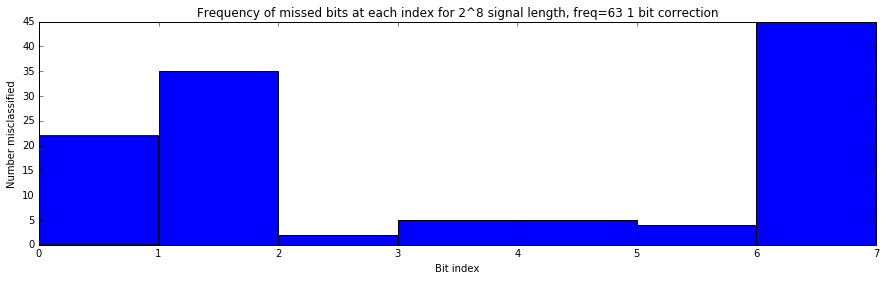

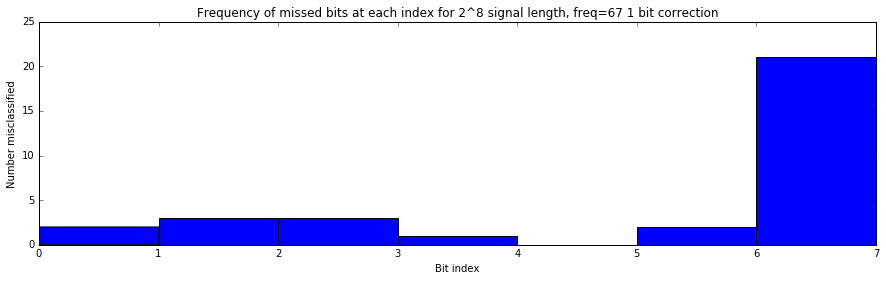

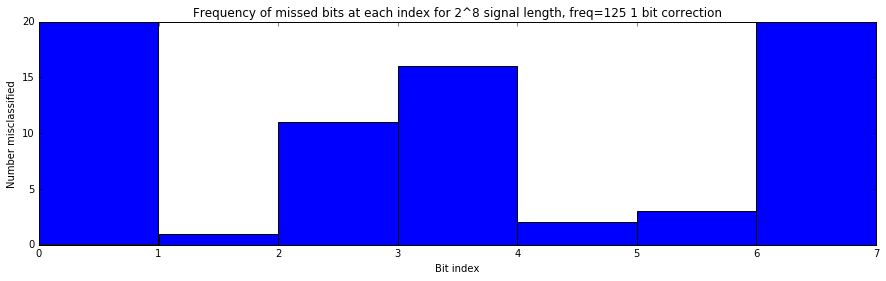

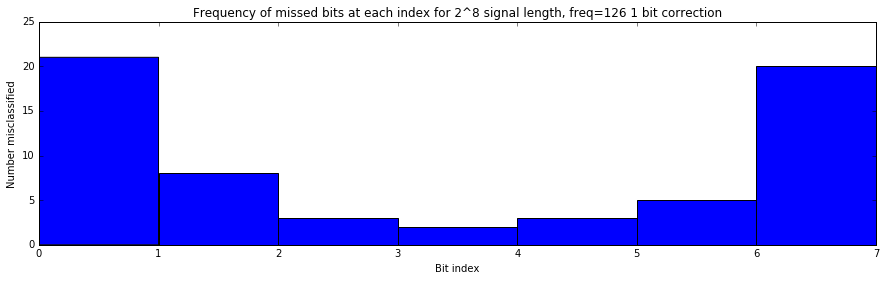

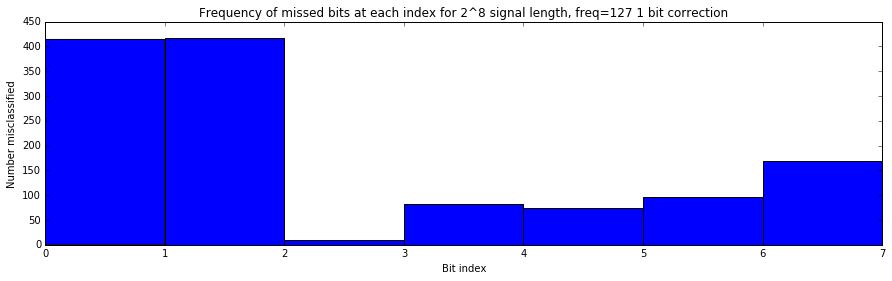

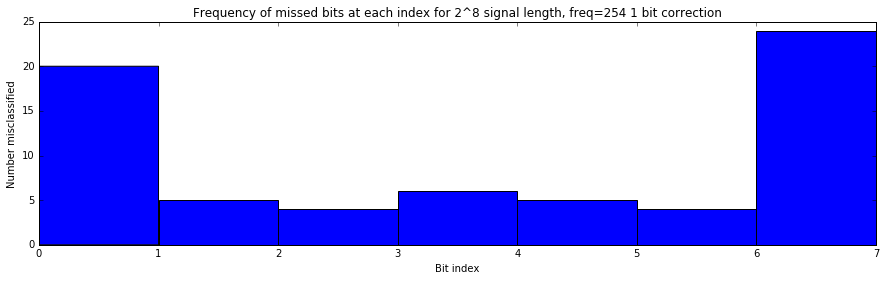

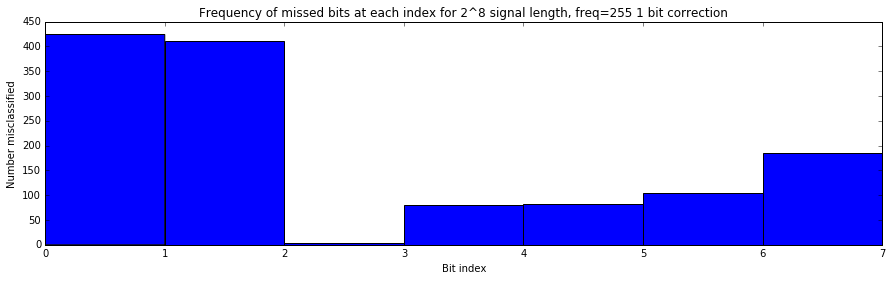

In [7]:
base, exp = 2, 8
bad_index = [63, 67, 125, 126, 127, 254, 255] 
m = 25
for ind in bad_index:
    bits = np.load('../data/boundary_testing_big/wrong_bits_full_exp{}.npy'.format(exp))
    wrongs = np.load('../data/boundary_testing_big/wrong_actual_full_exp{}.npy'.format(exp))
    plot_missed_bits_for_freq(base, exp, ind, wrongs, bits, title='Frequency of missed bits at each index for {}^{} signal length, freq={} 1 bit correction'.format(base, exp, ind))

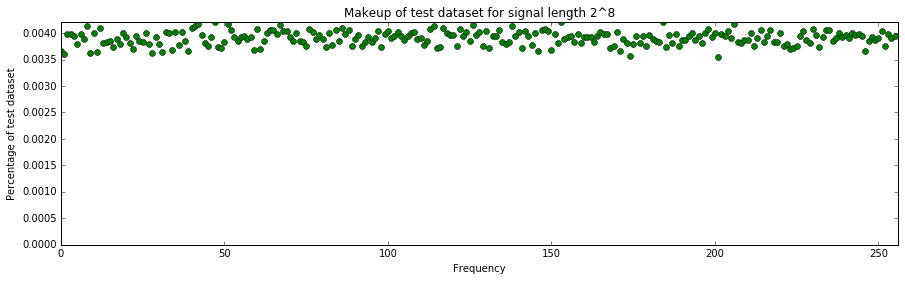

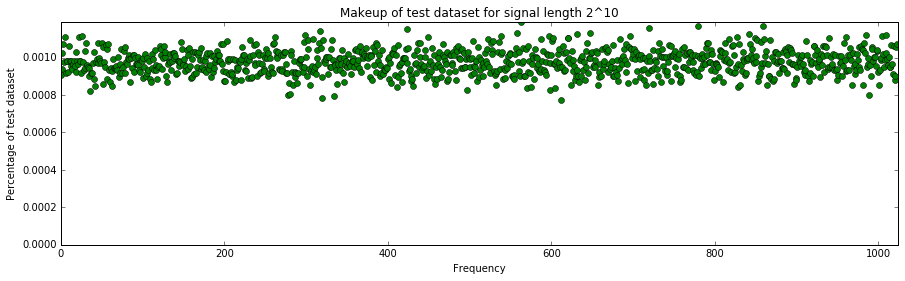

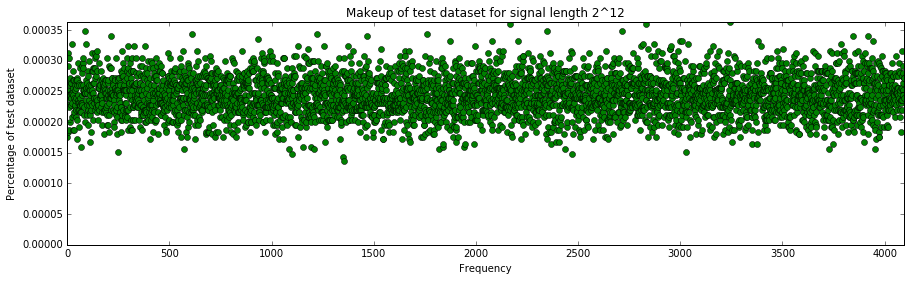

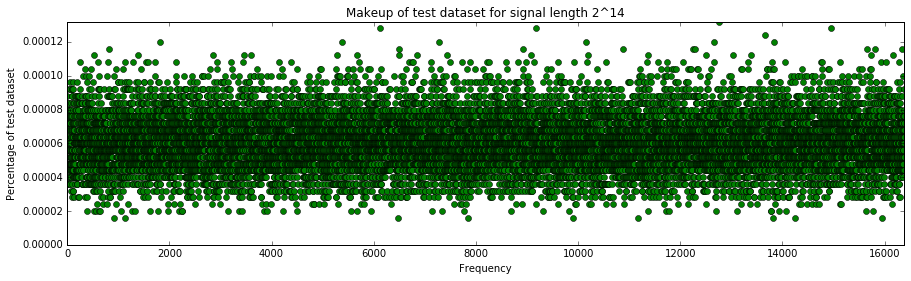

In [8]:
base, exps = 2, [8, 10, 12, 14]
m = 25
for e in exps:
    freq_counts = np.load('../data/boundary_testing_big/freq_counts_exp{}.npy'.format(e))
    size = sum(freq_counts)
    freq_percents = [i / size for i in freq_counts]
    N = base ** e
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Frequency') 
    ax.set_ylabel('Percentage of test dataset')
    ax.set_xlim(0, N)
    ax.set_ylim(0, max(freq_percents))
    ax.plot(list(range(N)), freq_percents, 'go')
    ax.set_title('Makeup of test dataset for signal length {}^{}'.format(base, e))
    plt.show()

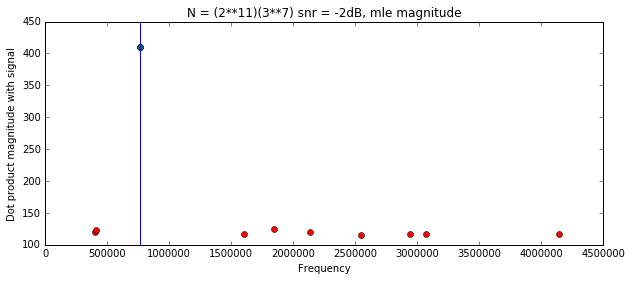

True


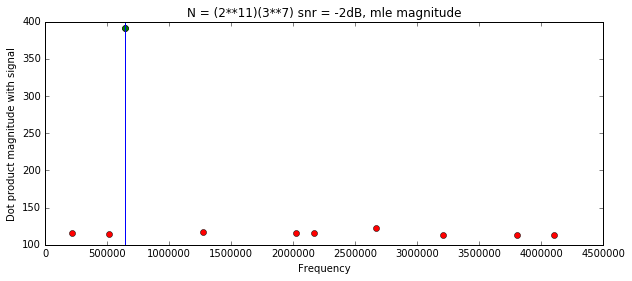

True


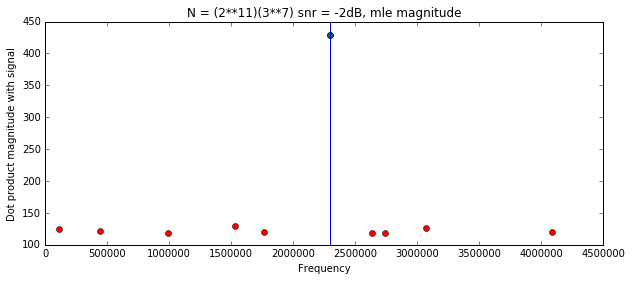

True


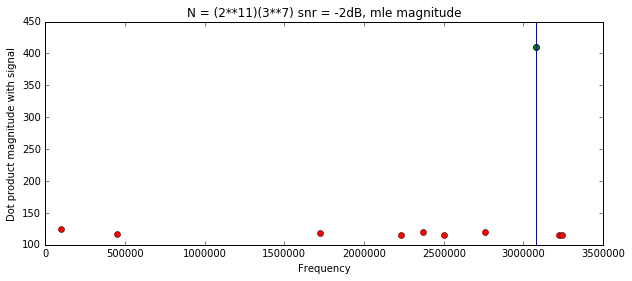

True


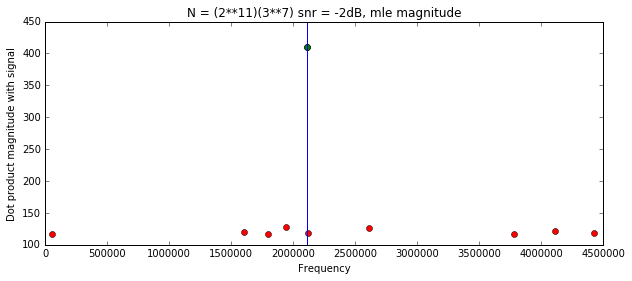

True



In [9]:
all_dots = np.load('../data/vm_data_mle/all_max_dotps.npy')
all_inds = np.load('../data/vm_data_mle/all_max_indices.npy')
all_freqs = np.load('../data/vm_data_mle/all_mle_freqs.npy')
upto = 20
[plot_mle(dot, ind, freq, title='N = (2**11)(3**7) snr = -2dB, mle magnitude') for dot, ind, freq in zip(all_dots[:upto], all_inds[:upto], all_freqs[:upto])]
print()